# Install the libraries

In [1]:
!pip install datasets transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# The Dataset

In [2]:
from datasets import list_datasets, load_dataset
AllDatasets = list_datasets()
len(AllDatasets)

21399

In [3]:
type(AllDatasets)

list

In [4]:
AllDatasets[:7]

['acronym_identification',
 'ade_corpus_v2',
 'adversarial_qa',
 'aeslc',
 'afrikaans_ner_corpus',
 'ag_news',
 'ai2_arc']

In [5]:
'emotion' in AllDatasets

True

In [6]:
emotion = load_dataset('emotion')

  0%|          | 0/3 [00:00<?, ?it/s]

In [7]:
emotion

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [8]:
train_ds = emotion['train']
train_ds

Dataset({
    features: ['text', 'label'],
    num_rows: 16000
})

In [9]:
len(train_ds)

16000

In [10]:
set(train_ds['label'])

{0, 1, 2, 3, 4, 5}

In [11]:
train_ds[0]

{'text': 'i didnt feel humiliated', 'label': 0}

In [12]:
train_ds[:7]

{'text': ['i didnt feel humiliated',
  'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake',
  'im grabbing a minute to post i feel greedy wrong',
  'i am ever feeling nostalgic about the fireplace i will know that it is still on the property',
  'i am feeling grouchy',
  'ive been feeling a little burdened lately wasnt sure why that was',
  'ive been taking or milligrams or times recommended amount and ive fallen asleep a lot faster but i also feel like so funny'],
 'label': [0, 0, 3, 2, 3, 0, 5]}

In [13]:
train_ds['text'][:7]

['i didnt feel humiliated',
 'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake',
 'im grabbing a minute to post i feel greedy wrong',
 'i am ever feeling nostalgic about the fireplace i will know that it is still on the property',
 'i am feeling grouchy',
 'ive been feeling a little burdened lately wasnt sure why that was',
 'ive been taking or milligrams or times recommended amount and ive fallen asleep a lot faster but i also feel like so funny']

In [14]:
train_ds.column_names

['text', 'label']

In [15]:
train_ds.features

{'text': Value(dtype='string', id=None),
 'label': ClassLabel(names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'], id=None)}

## My Dataset Is Not on the Hub

We can load the dataset locally by using the `csv` script and pointing the `data_files` argument to the `train.txt` file

In [16]:
# my_local_ds = load_dataset("csv", data_files="train.txt", sep=";", names=["text", "label"])

Here we’ve also specified the type of delimiter and the names of the columns. 

An even simpler approach is to just point the `data_files` argument to the URL itself

## From Datasets to DataFrames

In [17]:
emotion.set_format('pandas')
df = emotion['train'][:]
df.head()

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


In [18]:
emotion["train"].features["label"].int2str(5) == emotion["train"].features["label"].names[5]

True

In [19]:
def int2str(num):
  return emotion["train"].features["label"].names[num]

In [20]:
df['class'] = df['label'].apply(int2str)
df.head()

,text,label,class
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger


## Looking at the Class Distribution

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
count_cls = df['class'].value_counts(ascending=False)
count_cls

joy         5362
sadness     4666
anger       2159
fear        1937
love        1304
surprise     572
Name: class, dtype: int64

In [23]:
x = count_cls.index

In [24]:
y = list(count_cls)

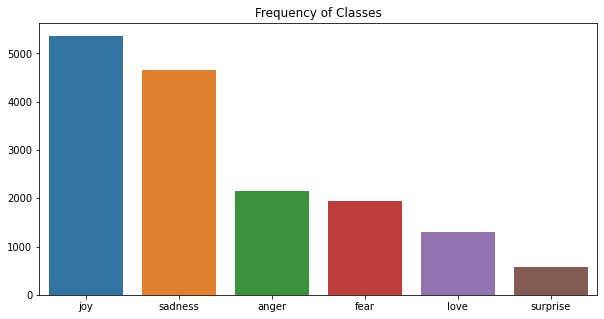

In [25]:
plt.figure(figsize=(10, 5))
sns.barplot(x=x, y=y)
plt.title("Frequency of Classes")
plt.show()

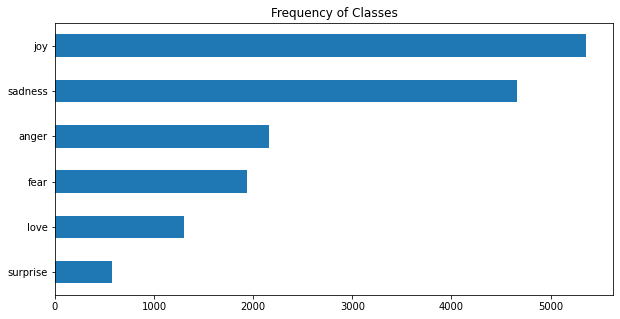

In [26]:
plt.figure(figsize=(10, 5))
df["class"].value_counts(ascending=True).plot.barh()
plt.title("Frequency of Classes")
plt.show()

## How Long Are Our Tweets?

In [27]:
df['Num_of_Tokens'] = df['text'].str.split().apply(len)
df.head()

,text,label,class,Num_of_Tokens
0,i didnt feel humiliated,0,sadness,4
1,i can go from feeling so hopeless to so damned...,0,sadness,21
2,im grabbing a minute to post i feel greedy wrong,3,anger,10
3,i am ever feeling nostalgic about the fireplac...,2,love,18
4,i am feeling grouchy,3,anger,4


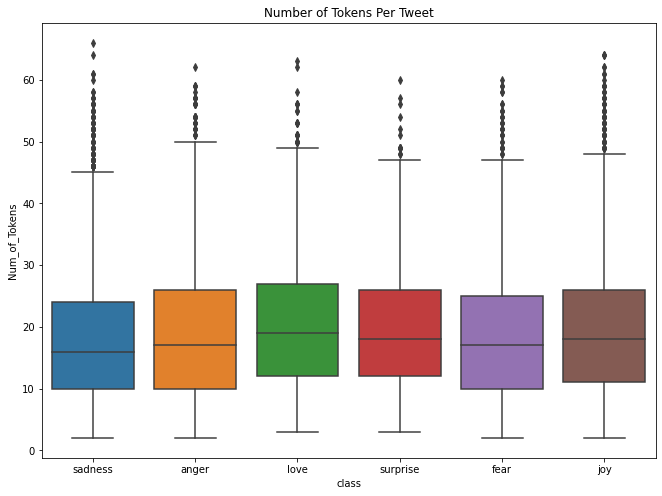

In [28]:
plt.figure(figsize=(11, 8))
sns.boxplot(data=df, x='class', y='Num_of_Tokens', )
plt.title("Number of Tokens Per Tweet")
plt.show()

From the plot we see that for each emotion, most tweets are around 15 words long and the longest tweets are well below DistilBERT’s maximum context size (512)

In [29]:
emotion.reset_format()

# From Text to Tokens

## Character Tokenization

In [30]:
text = "Hi, I'm Ayad. I'm from Egypt and I love NLP."
tokenized_text = list(text)
print(tokenized_text)

['H', 'i', ',', ' ', 'I', "'", 'm', ' ', 'A', 'y', 'a', 'd', '.', ' ', 'I', "'", 'm', ' ', 'f', 'r', 'o', 'm', ' ', 'E', 'g', 'y', 'p', 't', ' ', 'a', 'n', 'd', ' ', 'I', ' ', 'l', 'o', 'v', 'e', ' ', 'N', 'L', 'P', '.']


In [31]:
# char2id = {}
# for char in tokenized_text:
#   char = char.lower()
#   if char not in char2id:
#     char2id[char] = len(char2id)

In [32]:
char2id = {ch: idx for idx, ch in enumerate(sorted(set(tokenized_text)))}
char2id

{' ': 0,
 "'": 1,
 ',': 2,
 '.': 3,
 'A': 4,
 'E': 5,
 'H': 6,
 'I': 7,
 'L': 8,
 'N': 9,
 'P': 10,
 'a': 11,
 'd': 12,
 'e': 13,
 'f': 14,
 'g': 15,
 'i': 16,
 'l': 17,
 'm': 18,
 'n': 19,
 'o': 20,
 'p': 21,
 'r': 22,
 't': 23,
 'v': 24,
 'y': 25}

In [33]:
input_ids = [char2id[token] for token in tokenized_text]
input_ids

[6,
 16,
 2,
 0,
 7,
 1,
 18,
 0,
 4,
 25,
 11,
 12,
 3,
 0,
 7,
 1,
 18,
 0,
 14,
 22,
 20,
 18,
 0,
 5,
 15,
 25,
 21,
 23,
 0,
 11,
 19,
 12,
 0,
 7,
 0,
 17,
 20,
 24,
 13,
 0,
 9,
 8,
 10,
 3]

In [34]:
len(input_ids)==len(tokenized_text)

True

### convert input_ids to a 2D tensor of one-hot vectors

In [35]:
import torch
import torch.nn.functional as F
import tensorflow as tf

#### PyTorch

In [36]:
tensor_pt = torch.tensor(input_ids)
tensor_pt

tensor([ 6, 16,  2,  0,  7,  1, 18,  0,  4, 25, 11, 12,  3,  0,  7,  1, 18,  0,
        14, 22, 20, 18,  0,  5, 15, 25, 21, 23,  0, 11, 19, 12,  0,  7,  0, 17,
        20, 24, 13,  0,  9,  8, 10,  3])

In [37]:
one_hot_encodings = F.one_hot(tensor_pt, num_classes=len(char2id))
one_hot_encodings.shape

torch.Size([44, 26])

#### TensorFlow

In [38]:
tensor_tf = tf.convert_to_tensor(input_ids)
tensor_tf

<tf.Tensor: shape=(44,), dtype=int32, numpy=
array([ 6, 16,  2,  0,  7,  1, 18,  0,  4, 25, 11, 12,  3,  0,  7,  1, 18,
        0, 14, 22, 20, 18,  0,  5, 15, 25, 21, 23,  0, 11, 19, 12,  0,  7,
        0, 17, 20, 24, 13,  0,  9,  8, 10,  3], dtype=int32)>

In [39]:
one_hot_encodings = tf.one_hot(input_ids, depth=len(char2id))
one_hot_encodings.shape

TensorShape([44, 26])

## Word Tokenization

In [40]:
text

"Hi, I'm Ayad. I'm from Egypt and I love NLP."

In [41]:
tokenized_text = text.split()
tokenized_text

['Hi,', "I'm", 'Ayad.', "I'm", 'from', 'Egypt', 'and', 'I', 'love', 'NLP.']

### Subword Tokenization

In [42]:
# from transformers import DistilBertTokenizer
# checkpoint = "distilbert-base-uncased"
# distilbert_tokenizer = DistilBertTokenizer.from_pretrained(checkpoint)

In [43]:
from transformers import AutoTokenizer
checkpoint = "distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

In [44]:
tokenizer

DistilBertTokenizerFast(name_or_path='distilbert-base-uncased', vocab_size=30522, model_max_length=512, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'})

In [45]:
tokenizer.model_input_names

['input_ids', 'attention_mask']

In [46]:
tokenized_text = tokenizer(text)
tokenized_text

{'input_ids': [101, 7632, 1010, 1045, 1005, 1049, 1037, 25152, 1012, 1045, 1005, 1049, 2013, 5279, 1998, 1045, 2293, 17953, 2361, 1012, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

In [47]:
input_ids = tokenized_text.input_ids
print(input_ids)

[101, 7632, 1010, 1045, 1005, 1049, 1037, 25152, 1012, 1045, 1005, 1049, 2013, 5279, 1998, 1045, 2293, 17953, 2361, 1012, 102]


In [48]:
tokens = tokenizer.convert_ids_to_tokens(input_ids)
print(tokens)

['[CLS]', 'hi', ',', 'i', "'", 'm', 'a', '##yad', '.', 'i', "'", 'm', 'from', 'egypt', 'and', 'i', 'love', 'nl', '##p', '.', '[SEP]']


In [49]:
print(tokenizer.convert_tokens_to_string(tokens))
# print(tokenizer.convert_ids_to_tokens(input_ids))

[CLS] hi, i ' m ayad. i ' m from egypt and i love nlp. [SEP]


## Tokenizing the Whole Dataset

In [50]:
emotion['train'][:2]

{'text': ['i didnt feel humiliated',
  'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake'],
 'label': [0, 0]}

In [51]:
tokenize = lambda batch:tokenizer(batch['text'], padding=True, truncation=False)
tokenize

<function __main__.<lambda>(batch)>

`truncation=True` will truncate the examples to the model’s maximum context size.

In [52]:
tokenize(emotion['train'][:2])

{'input_ids': [[101, 1045, 2134, 2102, 2514, 26608, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [101, 1045, 2064, 2175, 2013, 3110, 2061, 20625, 2000, 2061, 9636, 17772, 2074, 2013, 2108, 2105, 2619, 2040, 14977, 1998, 2003, 8300, 102]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]}

In [53]:
tokenized_emotion = emotion.map(tokenize, batched=True)

  0%|          | 0/16 [00:00<?, ?ba/s]

  0%|          | 0/2 [00:00<?, ?ba/s]

  0%|          | 0/2 [00:00<?, ?ba/s]

In [54]:
tokenized_emotion

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 2000
    })
})

In [55]:
tokenized_emotion["train"].column_names

['text', 'label', 'input_ids', 'attention_mask']

# Export the prepared data

In [57]:
tokenized_emotion.save_to_disk('/content/drive/MyDrive/tokenized_emotion_data')

Saving the dataset (0/1 shards):   0%|          | 0/16000 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/2000 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/2000 [00:00<?, ? examples/s]